# Классификация действии по распознаванием действии

__Задача состоить из нескольких процессов__

1. Распознавание и получение данных(Получено...)
2. Нормализация и препроцессинг
3. Транформация данных для классификации
4. Классификация
5. Оценка классификации

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)
pd.options.display.max_rows = 10

__Чтение данных__

In [4]:
#df = pd.concat([pd.read_csv('TestDataSet.csv', sep=';'), pd.read_csv('WalkTest.csv'), pd.read_csv('JumpForwardData.csv')])
df = pd.read_csv('actionDataset.csv', sep=';')
df

,id,Nose_x0,Nose_y0,Neck_x1,Neck_y1,RShoulder_x2,RShoulder_y2,Relbow_x3,RElbow_y3,RWrist_x4,...,REye_x14,REye_y14,LEye_x15,LEye_y15,REar_x16,REar_y16,LEar_x17,LEar_y17,action,video_src
0,1,76,23,82,33,80,32,73,38,61,...,76,21,78,22,0,0,83,23,boxing,person01_boxing_d1_uncomp.avi
1,2,76,22,82,32,80,31,71,36,62,...,76,20,78,20,0,0,82,22,boxing,person01_boxing_d1_uncomp.avi
2,3,77,21,83,33,81,31,72,36,63,...,0,0,79,20,0,0,82,22,boxing,person01_boxing_d1_uncomp.avi
3,4,78,21,84,32,82,31,73,37,64,...,79,20,80,20,0,0,84,22,boxing,person01_boxing_d1_uncomp.avi
4,5,78,21,84,31,82,31,77,41,67,...,0,0,79,20,0,0,84,22,boxing,person01_boxing_d1_uncomp.avi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179341,179342,18,19,26,23,22,23,0,0,0,...,0,0,19,16,0,0,22,16,walking,person25_walking_d4_uncomp.avi
179342,179343,16,16,23,23,0,0,0,0,0,...,0,0,17,14,0,0,20,14,walking,person25_walking_d4_uncomp.avi
179343,179344,0,0,21,22,19,22,0,0,0,...,0,0,15,15,0,0,16,14,walking,person25_walking_d4_uncomp.avi
179344,179345,0,0,9,22,0,0,0,0,0,...,0,0,8,14,0,0,11,15,walking,person25_walking_d4_uncomp.avi


## функция для визуализации

In [235]:
from sklearn.decomposition import PCA
def pcaplot(x, y):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents,
                               columns = ['principal component 1', 'principal component 2'])
    
    finalDf = pd.concat([principalDf, pd.DataFrame(y, columns=['target'])], axis = 1)
    #finalDf['target'] = finalDf['target'].apply(lambda x: 'jump' if x == 0 else 'walk' if x == 1 else 'non-detected')
    fig = plt.figure(figsize = (8,8))

    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1, 2, 3, 4, 5]
    colors = ['r', 'b', 'g', 'brown', 'orange', 'black']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                   finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 10, alpha=1)
        ax.legend(targets)
        ax.grid()
    plt.show()

## Информация о датасете

In [215]:
df[df.action != 'walking'].video_src.drop_duplicates()

id
1          person01_boxing_d1_uncomp.avi
361        person01_boxing_d2_uncomp.avi
751        person01_boxing_d3_uncomp.avi
1215       person01_boxing_d4_uncomp.avi
1520       person02_boxing_d1_uncomp.avi
                       ...              
149817    person24_running_d4_uncomp.avi
149957    person25_running_d1_uncomp.avi
150063    person25_running_d2_uncomp.avi
150290    person25_running_d3_uncomp.avi
150409    person25_running_d4_uncomp.avi
Name: video_src, Length: 399, dtype: object

In [216]:
pd.DataFrame(df.values)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1,76,23,82,33,80,32,73,38,61,...,76,21,78,22,0,0,83,23,boxing,person01_boxing_d1_uncomp.avi
1,2,76,22,82,32,80,31,71,36,62,...,76,20,78,20,0,0,82,22,boxing,person01_boxing_d1_uncomp.avi
2,3,77,21,83,33,81,31,72,36,63,...,0,0,79,20,0,0,82,22,boxing,person01_boxing_d1_uncomp.avi
3,4,78,21,84,32,82,31,73,37,64,...,79,20,80,20,0,0,84,22,boxing,person01_boxing_d1_uncomp.avi
4,5,78,21,84,31,82,31,77,41,67,...,0,0,79,20,0,0,84,22,boxing,person01_boxing_d1_uncomp.avi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179341,179342,18,19,26,23,22,23,0,0,0,...,0,0,19,16,0,0,22,16,walking,person25_walking_d4_uncomp.avi
179342,179343,16,16,23,23,0,0,0,0,0,...,0,0,17,14,0,0,20,14,walking,person25_walking_d4_uncomp.avi
179343,179344,0,0,21,22,19,22,0,0,0,...,0,0,15,15,0,0,16,14,walking,person25_walking_d4_uncomp.avi
179344,179345,0,0,9,22,0,0,0,0,0,...,0,0,8,14,0,0,11,15,walking,person25_walking_d4_uncomp.avi


In [217]:
df.video_src.drop_duplicates()

id
1          person01_boxing_d1_uncomp.avi
361        person01_boxing_d2_uncomp.avi
751        person01_boxing_d3_uncomp.avi
1215       person01_boxing_d4_uncomp.avi
1520       person02_boxing_d1_uncomp.avi
                       ...              
177713    person24_walking_d4_uncomp.avi
177974    person25_walking_d1_uncomp.avi
178254    person25_walking_d2_uncomp.avi
178788    person25_walking_d3_uncomp.avi
179076    person25_walking_d4_uncomp.avi
Name: video_src, Length: 499, dtype: object

In [218]:
df.action.drop_duplicates().tolist()

['boxing', 'handclapping', 'handwaving', 'running', 'walking']

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179346 entries, 1 to 179346
Data columns (total 39 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            179346 non-null  int64 
 1   Nose_x0       179346 non-null  int64 
 2   Nose_y0       179346 non-null  int64 
 3   Neck_x1       179346 non-null  int64 
 4   Neck_y1       179346 non-null  int64 
 5   RShoulder_x2  179346 non-null  int64 
 6   RShoulder_y2  179346 non-null  int64 
 7   Relbow_x3     179346 non-null  int64 
 8   RElbow_y3     179346 non-null  int64 
 9   RWrist_x4     179346 non-null  int64 
 10  RWrist_y4     179346 non-null  int64 
 11  LShoulder_x5  179346 non-null  int64 
 12  LShoulder_y5  179346 non-null  int64 
 13  LElbow_x6     179346 non-null  int64 
 14  LElbow_y6     179346 non-null  int64 
 15  LWrist_x7     179346 non-null  int64 
 16  LWrist_y7     179346 non-null  int64 
 17  RHip_x8       179346 non-null  int64 
 18  RHip_y8       179346 non

In [220]:
df.index = df.id
X = df.drop(['id'], axis=1)
X = X.fillna(0)
X

,Nose_x0,Nose_y0,Neck_x1,Neck_y1,RShoulder_x2,RShoulder_y2,Relbow_x3,RElbow_y3,RWrist_x4,RWrist_y4,...,REye_x14,REye_y14,LEye_x15,LEye_y15,REar_x16,REar_y16,LEar_x17,LEar_y17,action,video_src
id,,,,,,,,,,,,,,,,,,,,,
1,76,23,82,33,80,32,73,38,61,36,...,76,21,78,22,0,0,83,23,boxing,person01_boxing_d1_uncomp.avi
2,76,22,82,32,80,31,71,36,62,36,...,76,20,78,20,0,0,82,22,boxing,person01_boxing_d1_uncomp.avi
3,77,21,83,33,81,31,72,36,63,35,...,0,0,79,20,0,0,82,22,boxing,person01_boxing_d1_uncomp.avi
4,78,21,84,32,82,31,73,37,64,36,...,79,20,80,20,0,0,84,22,boxing,person01_boxing_d1_uncomp.avi
5,78,21,84,31,82,31,77,41,67,37,...,0,0,79,20,0,0,84,22,boxing,person01_boxing_d1_uncomp.avi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179342,18,19,26,23,22,23,0,0,0,0,...,0,0,19,16,0,0,22,16,walking,person25_walking_d4_uncomp.avi
179343,16,16,23,23,0,0,0,0,0,0,...,0,0,17,14,0,0,20,14,walking,person25_walking_d4_uncomp.avi
179344,0,0,21,22,19,22,0,0,0,0,...,0,0,15,15,0,0,16,14,walking,person25_walking_d4_uncomp.avi


__Приводим классы в нумерованный вид__

In [221]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(X['action'])
X['label'] = le.transform(X['action'])
X = X.drop(['action'], axis=1)
X

,Nose_x0,Nose_y0,Neck_x1,Neck_y1,RShoulder_x2,RShoulder_y2,Relbow_x3,RElbow_y3,RWrist_x4,RWrist_y4,...,REye_x14,REye_y14,LEye_x15,LEye_y15,REar_x16,REar_y16,LEar_x17,LEar_y17,video_src,label
id,,,,,,,,,,,,,,,,,,,,,
1,76,23,82,33,80,32,73,38,61,36,...,76,21,78,22,0,0,83,23,person01_boxing_d1_uncomp.avi,0
2,76,22,82,32,80,31,71,36,62,36,...,76,20,78,20,0,0,82,22,person01_boxing_d1_uncomp.avi,0
3,77,21,83,33,81,31,72,36,63,35,...,0,0,79,20,0,0,82,22,person01_boxing_d1_uncomp.avi,0
4,78,21,84,32,82,31,73,37,64,36,...,79,20,80,20,0,0,84,22,person01_boxing_d1_uncomp.avi,0
5,78,21,84,31,82,31,77,41,67,37,...,0,0,79,20,0,0,84,22,person01_boxing_d1_uncomp.avi,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179342,18,19,26,23,22,23,0,0,0,0,...,0,0,19,16,0,0,22,16,person25_walking_d4_uncomp.avi,4
179343,16,16,23,23,0,0,0,0,0,0,...,0,0,17,14,0,0,20,14,person25_walking_d4_uncomp.avi,4
179344,0,0,21,22,19,22,0,0,0,0,...,0,0,15,15,0,0,16,14,person25_walking_d4_uncomp.avi,4


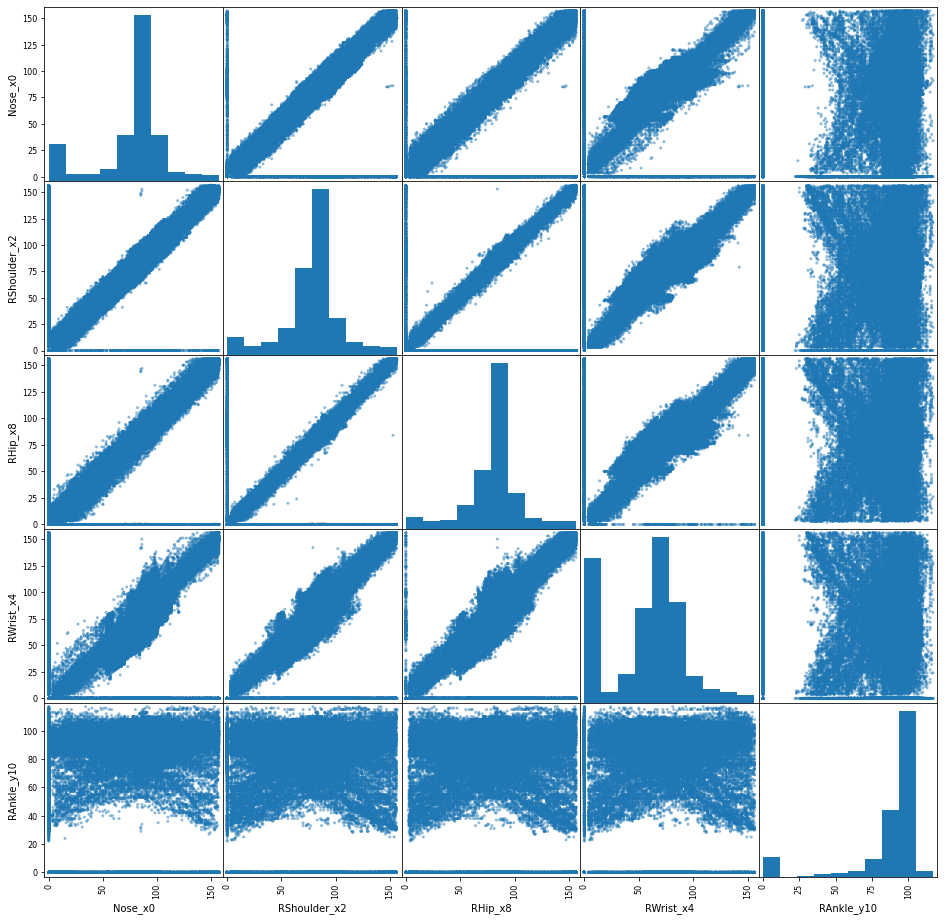

In [222]:
from pandas.plotting import scatter_matrix

list_cols = ['Nose_x0', 'RShoulder_x2', 'RHip_x8', 'RWrist_x4', 'RAnkle_y10']
scatter_matrix(X[list_cols], alpha=0.5, figsize=(16, 16))
plt.show()

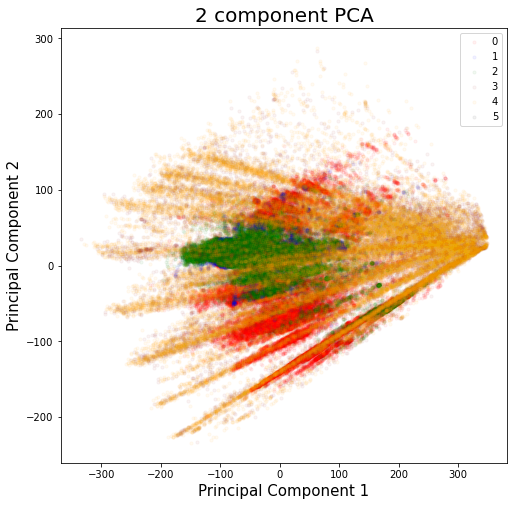

In [228]:
pcaplot(X.iloc[:,:36].values,X['label'].values)

__Функция для того чтобы сделать много данных для задачи классификации__

In [353]:
def to10frames(x, n_actions=10, first=False):
    result = []
    y = []
    for i in x.video_src.drop_duplicates().tolist():
        for j in range(x[x.video_src == i].values.shape[0]-n_actions):
            result.append(x[x.video_src == i].values[j:j+n_actions,:-2].reshape(36*n_actions).tolist())
            y.append([x[x.video_src == i].values[j,-1]])
        
    return np.array(result), np.array(y)

def firstarray(x, n_actions=10):
    result = np.zeros((x.video_src.drop_duplicates().shape[0], 36*n_actions))
    y = np.zeros((x.video_src.drop_duplicates().shape[0], 1))
    
    for i, name in enumerate(x.video_src.drop_duplicates().tolist()):
        print(i, '/', result.shape[0])
        
        result[i] = x[x.video_src == name].values[:n_actions,:-2].reshape(36*n_actions)
        y[i] = x[x.video_src == name].values[0,-1]
        
    return np.array(result), np.array(y)

In [314]:
x, y = firstarray(X, n_actions=15) # n_actions = 40 actions
print(x)
print(y)

0 / 499
1 / 499
2 / 499
3 / 499
4 / 499
5 / 499
6 / 499
7 / 499
8 / 499
9 / 499
10 / 499
11 / 499
12 / 499
13 / 499
14 / 499
15 / 499
16 / 499
17 / 499
18 / 499
19 / 499
20 / 499
21 / 499
22 / 499
23 / 499
24 / 499
25 / 499
26 / 499
27 / 499
28 / 499
29 / 499
30 / 499
31 / 499
32 / 499
33 / 499
34 / 499
35 / 499
36 / 499
37 / 499
38 / 499
39 / 499
40 / 499
41 / 499
42 / 499
43 / 499
44 / 499
45 / 499
46 / 499
47 / 499
48 / 499
49 / 499
50 / 499
51 / 499
52 / 499
53 / 499
54 / 499
55 / 499
56 / 499
57 / 499
58 / 499
59 / 499
60 / 499
61 / 499
62 / 499
63 / 499
64 / 499
65 / 499
66 / 499
67 / 499
68 / 499
69 / 499
70 / 499
71 / 499
72 / 499
73 / 499
74 / 499
75 / 499
76 / 499
77 / 499
78 / 499
79 / 499
80 / 499
81 / 499
82 / 499
83 / 499
84 / 499
85 / 499
86 / 499
87 / 499
88 / 499
89 / 499
90 / 499
91 / 499
92 / 499
93 / 499
94 / 499
95 / 499
96 / 499
97 / 499
98 / 499
99 / 499
100 / 499
101 / 499
102 / 499
103 / 499
104 / 499
105 / 499
106 / 499
107 / 499
108 / 499
109 / 499
110 / 499


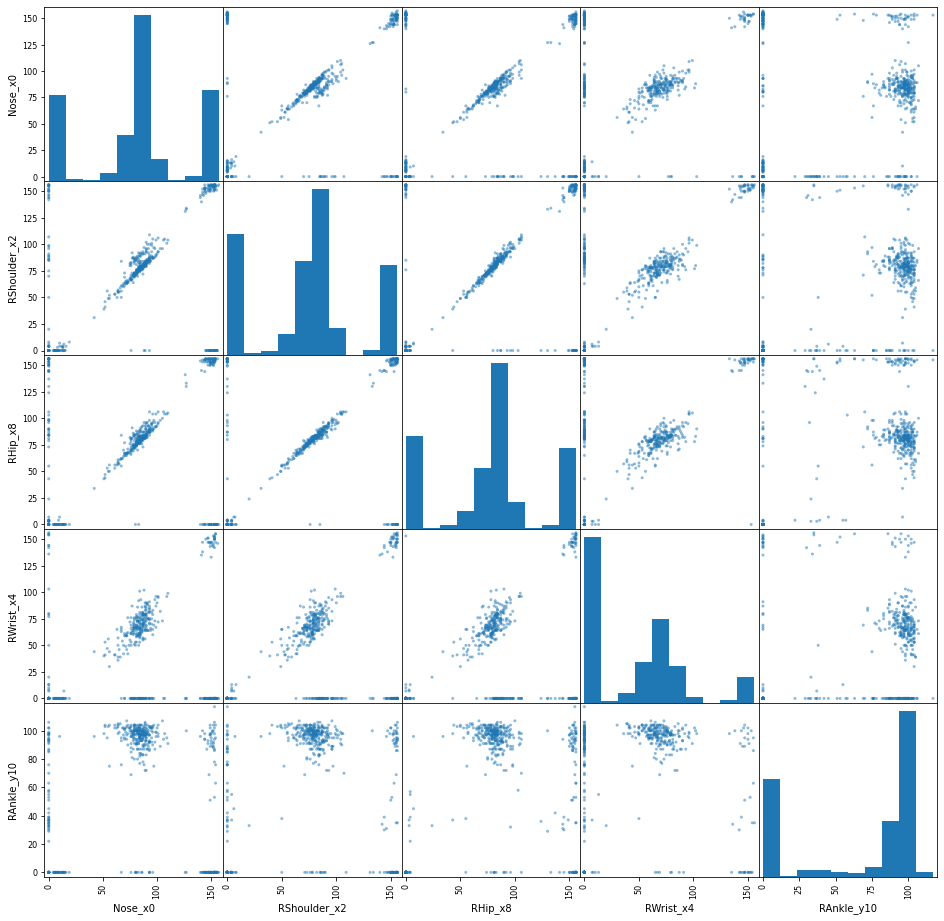

In [315]:
data_numeric = pd.DataFrame(x[:,:36], columns=df.columns[1:-2].tolist())
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(16, 16))
plt.show()

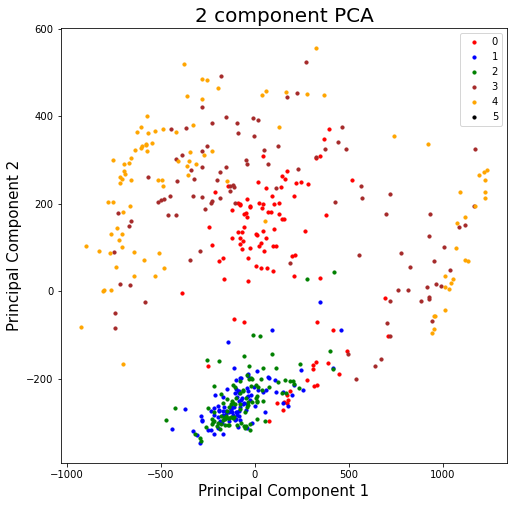

In [317]:
pcaplot(x,y)

__Отмастасштабируем основные классы и добавляем новый класс для того чтобы оценить шумные объекты такие как Non-detected действии__
$$f(x_i) = x_i * (float)random(0:5) + (float)random(0:50)$$
__Рандомные объекты для Non-detected:__
$$f(x_i,_j) = x_i,_j * (float)random(0:1) + (float)random(0:10)$$

In [318]:
first = np.array(list(map(lambda x:x*np.random.random(size=1)*5 + np.random.random(size=1)*50, x)))
second = np.array(list(map(lambda x:x*np.random.random(size=x.shape[0]) + np.random.random(size=x.shape[0])*10, x)))

print(first.shape)
print(second.shape)

(499, 540)
(499, 540)


In [361]:
x_noised = np.concatenate((x, second), axis=0)
y_noised = np.concatenate((y, np.array([5]*second.shape[0]).reshape((second.shape[0],1))), axis=0)

In [362]:
x_noised

array([[ 76.        ,  23.        ,  82.        , ...,   0.        ,
         85.        ,  22.        ],
       [ 90.        ,  33.        ,  94.        , ...,   0.        ,
         97.        ,  19.        ],
       [ 78.        ,  16.        ,  86.        , ...,   0.        ,
         85.        ,  21.        ],
       ...,
       [  6.35940913,   3.23718562,   3.67318228, ...,   8.71884382,
         20.34996636,   7.01367978],
       [ 54.40638747,  23.44999167,  86.80443146, ...,   2.59076858,
        104.8440782 ,  14.54193547],
       [ 12.56288259,  13.1431771 ,  14.68955916, ...,   4.48320561,
          4.10449231,   5.46737581]])

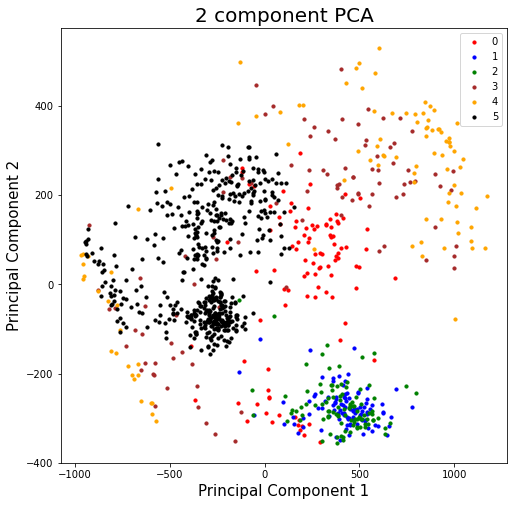

In [364]:
pcaplot(x_noised,y_noised)

## __Формула нормализации по L2 регуляризатор__

__для l1 regularization (Lasso)__ $$X[i,j] = \frac{X[i,j]}{||X_i||_1}\$$

__для l2 regularization (Ridge)__ $$X[i,j] = \frac{X[i,j]}{||X_i||_2}\$$

$$z = ||X||_1 = \sum_{i=1}^n|x_i|$$

$$z = ||X||_2 = \sqrt{\sum_{i=1}^nx_i^2}$$


In [365]:
from sklearn.preprocessing import normalize
X_normalized = normalize(x_noised, 'l2')
print(X_normalized)

[[0.0534713  0.0161821  0.05769271 ... 0.         0.05980342 0.01547853]
 [0.05688556 0.02085804 0.0594138  ... 0.         0.06130999 0.01200917]
 [0.05489198 0.01125989 0.06052193 ... 0.         0.05981819 0.01477861]
 ...
 [0.02215429 0.01127739 0.01279627 ... 0.03037386 0.07089323 0.02443357]
 [0.03857208 0.01662516 0.06154107 ... 0.00183676 0.0743305  0.01030968]
 [0.02130223 0.02228621 0.02490833 ... 0.00760194 0.00695978 0.00927075]]


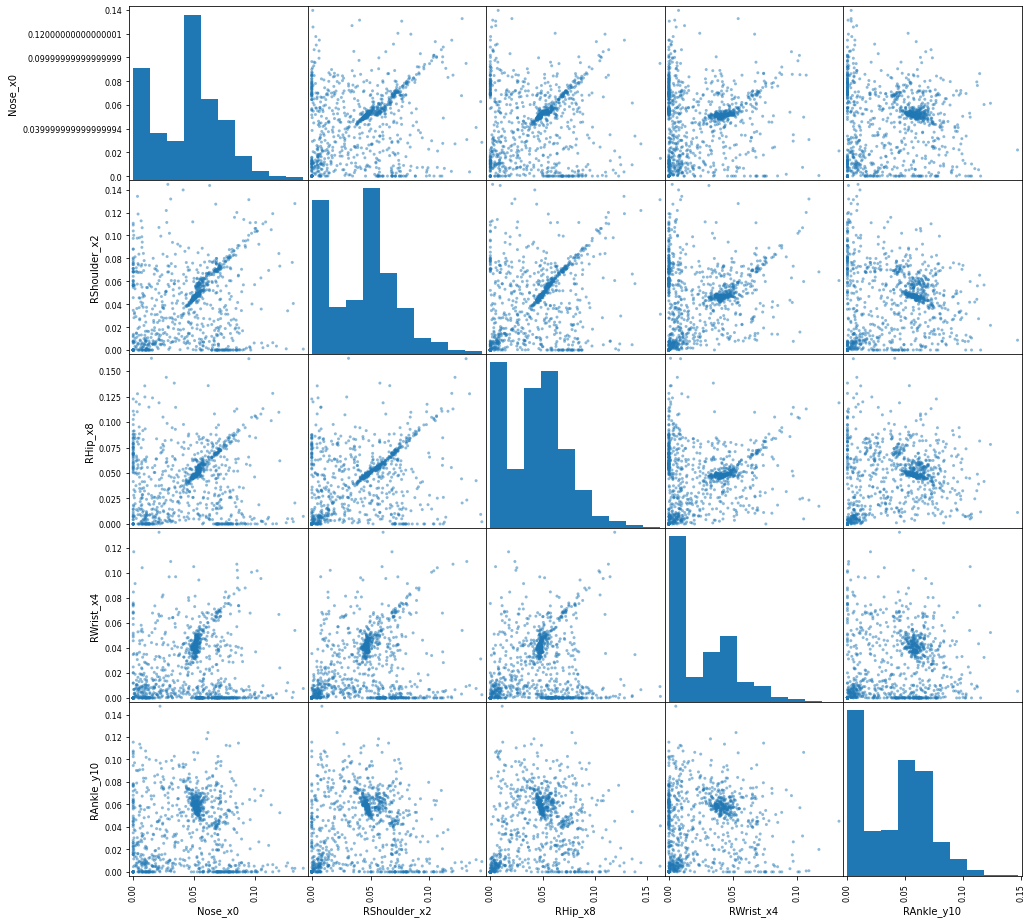

In [366]:
data_numeric = pd.DataFrame(X_normalized[:,:36], columns=df.columns[1:-2].tolist())
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(16, 16))
plt.show()

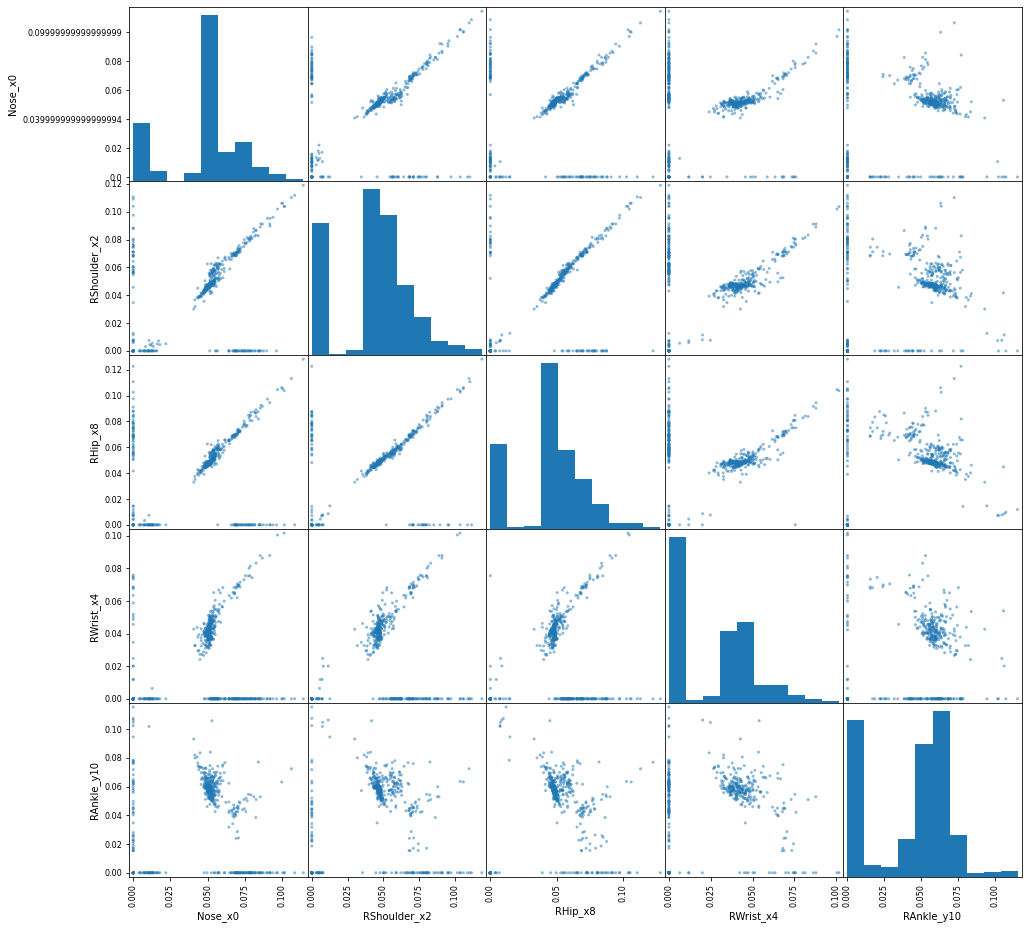

In [367]:
data_numeric = pd.DataFrame(X_normalized[:first.shape[0],:36], columns=df.columns[1:-2].tolist())
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(16, 16))
plt.show()

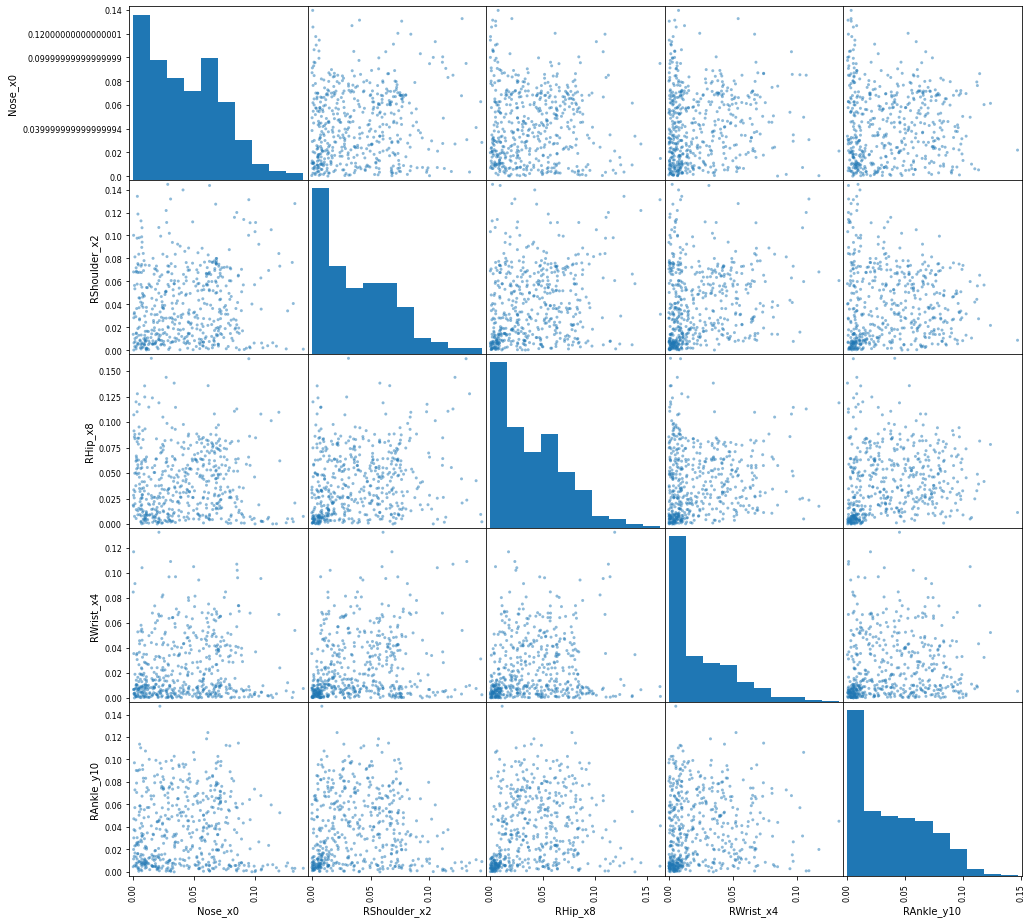

In [368]:
data_numeric = pd.DataFrame(X_normalized[first.shape[0]:,:36], columns=df.columns[1:-2].tolist())
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(16, 16))
plt.show()

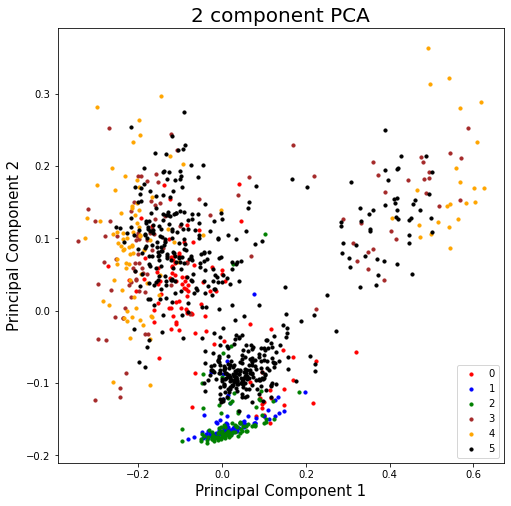

In [370]:
pcaplot(X_normalized, y_noised)

__Train-test splitting ratio 0.2 for test 0.8 for train and random seed = 42__

In [371]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_noised, train_size=0.8, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(798, 540)
(200, 540)


## Classification algorithms

In [372]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
target_names = ['boxing', 'handclapping', 'handwaving', 'running', 'walking', 'non-detected']

## Defs

In [373]:
import itertools


def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='RdBu'):

    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace(' / ', '/')
    lines = classificationReport.split('\n')

    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1:]:  # if you don't want avg/total result, then change [1:] into [1:-1]
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup)
                   for idx, sup in enumerate(support)]

    plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels, rotation=45)
    plt.yticks(np.arange(len(classes)), yticklabels)

    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        plt.text(j, i, format(plotMat[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black")

    plt.ylabel('Metrics')
    plt.xlabel('Classes')
    plt.tight_layout()
    plt.show()

__Naive Bayes classifier__

C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


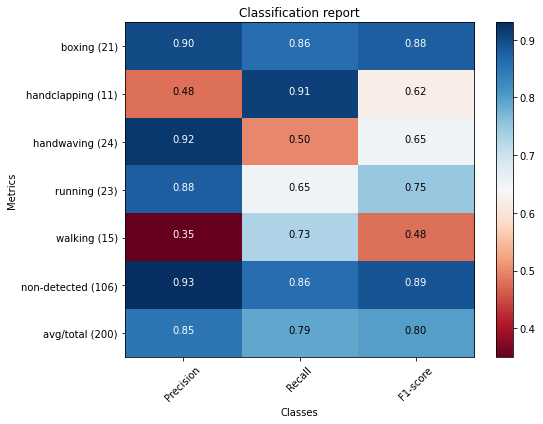

Text(51.0, 0.5, 'predicted label')

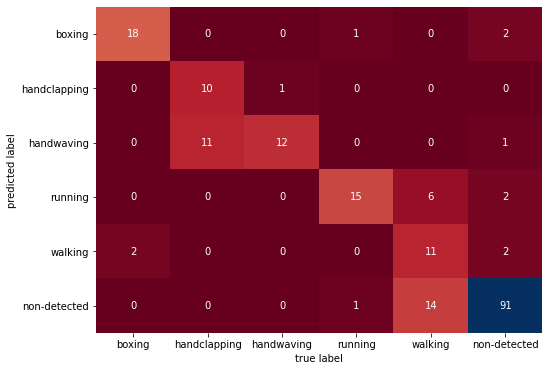

In [374]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

predictions = nb.predict(X_test)

plot_classification_report(classification_report(y_test, predictions, target_names=target_names))

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cmap='RdBu', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')

__Decision Tree classifier__

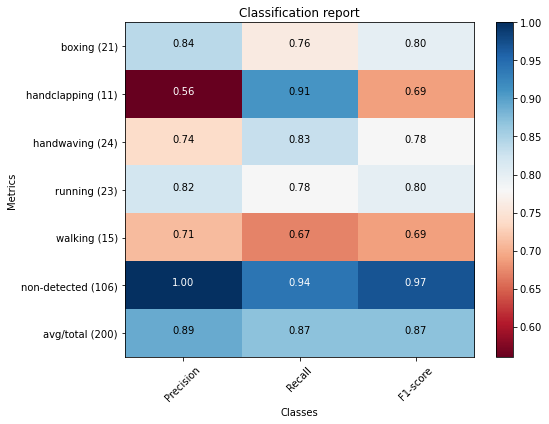

Text(51.0, 0.5, 'predicted label')

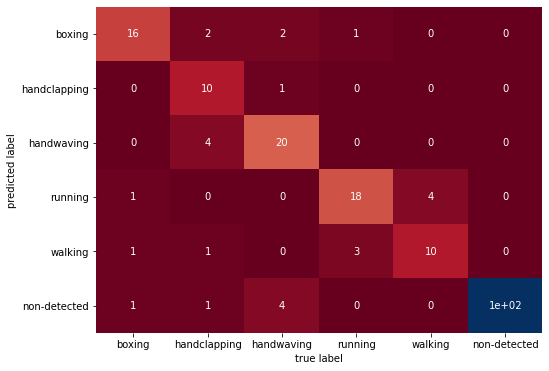

In [375]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

predictions = dt.predict(X_test)

plot_classification_report(classification_report(y_test, predictions, target_names=target_names))

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cmap='RdBu', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

__Random Forest classifier__

C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


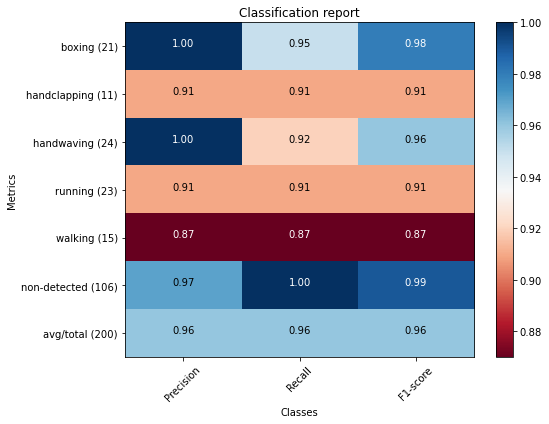

Wall time: 8.03 s


Text(51.0, 0.5, 'predicted label')

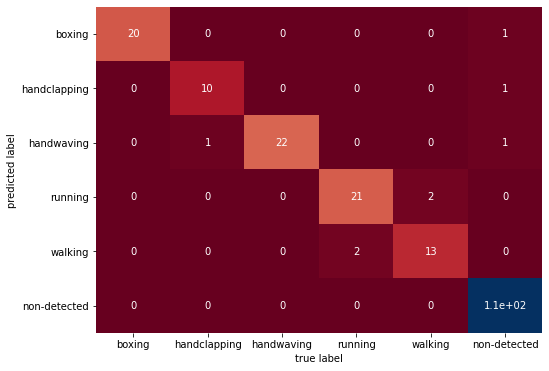

In [387]:
%%time
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=150, criterion='entropy')
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
predictions = clf.predict(X_test)

plot_classification_report(classification_report(y_test, predictions, target_names=target_names))

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cmap='RdBu', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

__XGBoost classifier__

C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


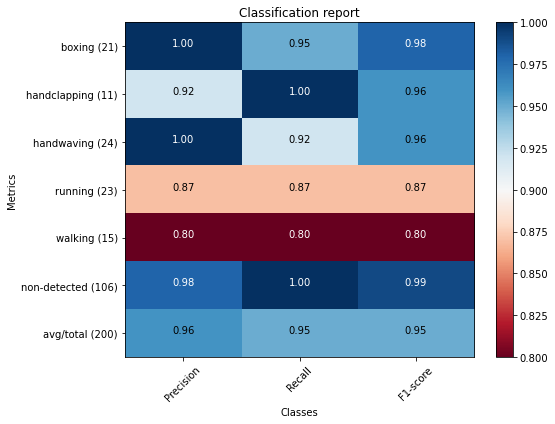

Text(51.0, 0.5, 'predicted label')

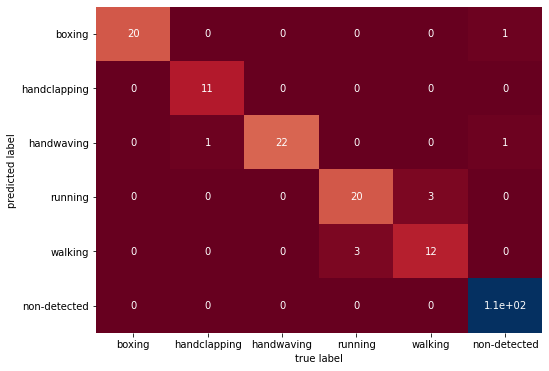

In [378]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
predictions = xgb_model.predict(X_test)

plot_classification_report(classification_report(y_test, predictions, target_names=target_names))

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cmap='RdBu', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

__CatBoost classifier__

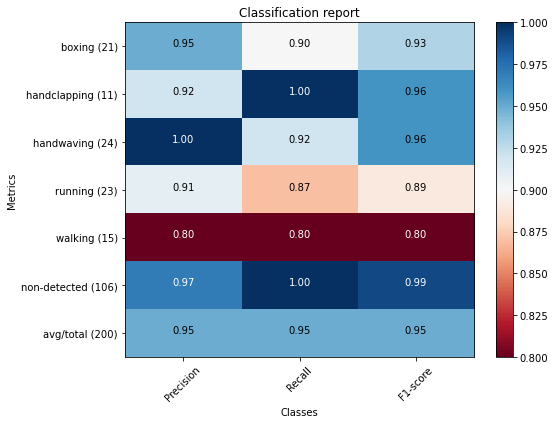

Text(51.0, 0.5, 'predicted label')

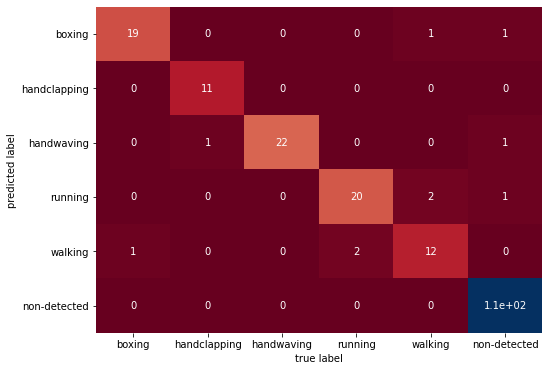

In [380]:
from catboost import CatBoostClassifier, Pool
train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_test, label=y_test)

cbc = CatBoostClassifier(
    iterations=60,
    learning_rate=0.1,
    random_strength=0.1,
    depth=8,
    task_type="GPU",
    devices='0:1',
    loss_function='MultiClass',
    eval_metric='Accuracy',
    leaf_estimation_method='Newton'
)
cbc.fit(X_train, y_train, logging_level='Silent')

predictions = cbc.predict(X_test)

plot_classification_report(classification_report(y_test, predictions, target_names=target_names))

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cmap='RdBu', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Experiment

In [381]:
le.transform(['walking'])

array([4], dtype=int64)

In [382]:
test = pd.concat([pd.read_csv('TestDataSet.csv', sep=';'), pd.read_csv('WalkTest.csv'), pd.read_csv('JumpForwardData.csv')])
test = test.fillna(0)
test['label'] = test.action.apply(lambda x: 4 if x == 'walk' else 5)
test = test.drop(['id', 'action'], axis=1)
test

,Nose_x0,Nose_y0,Neck_x1,Neck_y1,RShoulder_x2,RShoulder_y2,Relbow_x3,RElbow_y3,RWrist_x4,RWrist_y4,...,REye_x14,REye_y14,LEye_x15,LEye_y15,REar_x16,REar_y16,LEar_x17,LEar_y17,video_src,label
0,162.0,60.0,166.0,67.0,163.0,66.0,162.0,74.0,158.0,78.0,...,161.0,59.0,163.0,59.0,0.0,0.0,165.0,60.0,C:/Users/User/tf-pose-estimationActionRecognit...,4
1,159.0,61.0,163.0,67.0,162.0,67.0,160.0,74.0,156.0,78.0,...,159.0,59.0,160.0,59.0,0.0,0.0,163.0,60.0,C:/Users/User/tf-pose-estimationActionRecognit...,4
2,158.0,61.0,163.0,67.0,160.0,67.0,159.0,75.0,153.0,79.0,...,158.0,59.0,158.0,59.0,0.0,0.0,161.0,60.0,C:/Users/User/tf-pose-estimationActionRecognit...,4
3,156.0,61.0,160.0,67.0,159.0,67.0,157.0,75.0,153.0,79.0,...,156.0,59.0,157.0,59.0,0.0,0.0,159.0,60.0,C:/Users/User/tf-pose-estimationActionRecognit...,4
4,154.0,60.0,158.0,67.0,157.0,67.0,155.0,75.0,150.0,79.0,...,154.0,59.0,155.0,59.0,0.0,0.0,158.0,60.0,C:/Users/User/tf-pose-estimationActionRecognit...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,960.0,329.0,889.0,376.0,907.0,383.0,954.0,462.0,1019.0,473.0,...,948.0,317.0,0.0,0.0,919.0,325.0,0.0,0.0,Forward Jumps CROSSMET.mp4,5
184,966.0,344.0,895.0,387.0,907.0,391.0,996.0,466.0,1043.0,442.0,...,960.0,333.0,0.0,0.0,924.0,337.0,0.0,0.0,Forward Jumps CROSSMET.mp4,5
185,978.0,348.0,907.0,399.0,924.0,403.0,1013.0,462.0,1049.0,415.0,...,966.0,340.0,0.0,0.0,936.0,344.0,0.0,0.0,Forward Jumps CROSSMET.mp4,5
186,984.0,352.0,913.0,399.0,930.0,403.0,1025.0,454.0,1049.0,403.0,...,978.0,340.0,0.0,0.0,942.0,352.0,0.0,0.0,Forward Jumps CROSSMET.mp4,5


In [383]:
real_x, real_y = firstarray(test, n_actions=15)
real_x = normalize(real_x, 'l2')

0 / 23
1 / 23
2 / 23
3 / 23
4 / 23
5 / 23
6 / 23
7 / 23
8 / 23
9 / 23
10 / 23
11 / 23
12 / 23
13 / 23
14 / 23
15 / 23
16 / 23
17 / 23
18 / 23
19 / 23
20 / 23
21 / 23
22 / 23


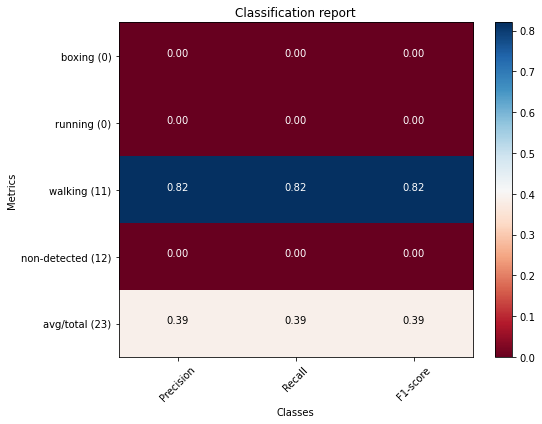

Text(51.0, 0.5, 'predicted label')

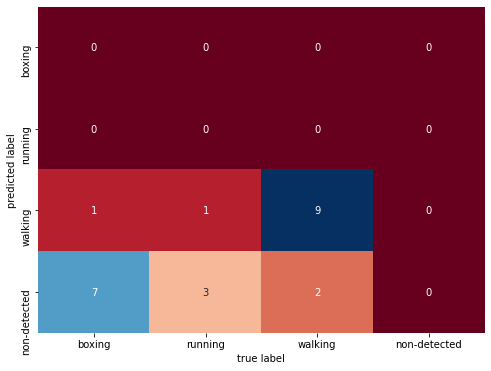

In [386]:
real_predictions = clf.predict(real_x)

targ = [target_names[i] for i in list(set(real_predictions.astype(int)))] + ['non-detected']

plot_classification_report(classification_report(real_y, real_predictions, target_names=targ))

sns.heatmap(confusion_matrix(real_y, real_predictions), square=False, annot=True, cmap='RdBu', cbar=False,
            xticklabels=targ,
            yticklabels=targ)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Clustering

In [388]:
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph

params = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}
bandwidth = cluster.estimate_bandwidth(x, quantile=params['quantile'])

connectivity = kneighbors_graph(
        x, n_neighbors=params['n_neighbors'], include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])


affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])

birch = cluster.Birch(n_clusters=params['n_clusters'])

gmm = mixture.GaussianMixture(
    n_components=params['n_clusters'], covariance_type='full')

clustering_algorithms = (
    ('MiniBatchKMeans', two_means),
    ('AffinityPropagation', affinity_propagation),
    ('MeanShift', ms),
    ('Birch', birch),
    ('GaussianMixture', gmm)
)

In [391]:
import itertools
def validate_with_mappings(preds, target):
    permutations = itertools.permutations([0, 1, 2, 3, 4, 5])
    for a, b, c, d, e, f in permutations:
        mapping = {5: a, 4: b, 3: c, 2: d, 1: e, 0: f}
        mapped_preds = [mapping[pred] for pred in preds]
        print(float(sum(mapped_preds != target)) / len(target))

In [392]:
import time
import warnings

for name, algorithm in clustering_algorithms:
    t0 = time.time()

    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(X_train)

    t1 = time.time()
    y_pred = algorithm.predict(X_test)
    
    validate_with_mappings(y_pred, y_test.reshape(y_test.shape[0]))
    print('')

0.755
0.67
0.755
0.63
0.895
0.855
0.775
0.69
0.635
0.725
0.775
0.95
0.775
0.65
0.635
0.725
0.735
0.95
0.945
0.905
0.805
0.98
0.765
0.98
0.755
0.67
0.755
0.63
0.895
0.855
0.775
0.69
0.7
0.725
0.84
0.95
0.775
0.65
0.7
0.725
0.8
0.95
0.945
0.905
0.87
0.98
0.83
0.98
0.775
0.69
0.635
0.725
0.775
0.95
0.775
0.69
0.7
0.725
0.84
0.95
0.655
0.745
0.72
0.745
0.895
0.83
0.825
1.0
0.89
1.0
0.925
0.86
0.775
0.65
0.635
0.725
0.735
0.95
0.775
0.65
0.7
0.725
0.8
0.95
0.655
0.745
0.72
0.745
0.895
0.83
0.785
1.0
0.85
1.0
0.925
0.86
0.945
0.905
0.805
0.98
0.765
0.98
0.945
0.905
0.87
0.98
0.83
0.98
0.825
1.0
0.89
1.0
0.925
0.86
0.785
1.0
0.85
1.0
0.925
0.86
0.755
0.67
0.755
0.63
0.895
0.855
0.775
0.69
0.635
0.725
0.775
0.95
0.775
0.65
0.635
0.725
0.735
0.95
0.945
0.905
0.805
0.98
0.765
0.98
0.755
0.67
0.755
0.63
0.895
0.855
0.77
0.685
0.715
0.665
0.855
0.89
0.77
0.645
0.715
0.665
0.815
0.89
0.94
0.9
0.885
0.92
0.845
0.92
0.775
0.69
0.635
0.725
0.775
0.95
0.77
0.685
0.715
0.665
0.855
0.89
0.65
0.74
0.735
0

0.895
0.47
0.925
0.47
0.88
0.925
0.88
0.47
0.925
0.47
0.895
0.925
0.895
0.47
0.88
0.47
0.895
0.88
0.895
0.925
0.88
0.925
0.895
0.88
0.895
0.47
0.885
0.47
0.88
0.885
0.88
0.47
0.885
0.47
0.895
0.885
0.895
0.47
0.88
0.47
0.895
0.88
0.895
0.885
0.88
0.885
0.895
0.88
0.895
0.925
0.885
0.925
0.88
0.885
0.88
0.925
0.885
0.925
0.895
0.885
0.895
0.925
0.88
0.925
0.895
0.88
0.895
0.885
0.88
0.885
0.895
0.88
0.895
0.47
0.925
0.47
0.885
0.925
0.885
0.47
0.925
0.47
0.945
0.925
0.945
0.47
0.885
0.47
0.945
0.885
0.945
0.925
0.885
0.925
0.945
0.885
0.945
0.47
0.925
0.47
0.885
0.925
0.885
0.47
0.925
0.47
0.895
0.925
0.895
0.47
0.885
0.47
0.895
0.885
0.895
0.925
0.885
0.925
0.895
0.885
0.895
0.47
0.925
0.47
0.945
0.925
0.945
0.47
0.925
0.47
0.895
0.925
0.895
0.47
0.945
0.47
0.895
0.945
0.895
0.925
0.945
0.925
0.895
0.945
0.895
0.47
0.885
0.47
0.945
0.885
0.945
0.47
0.885
0.47
0.895
0.885
0.895
0.47
0.945
0.47
0.895
0.945
0.895
0.885
0.945
0.885
0.895
0.945
0.895
0.925
0.885
0.925
0.945
0.885
0.945
0.92

0.475
0.81
0.9
0.965
0.97
0.465
0.38
0.805
0.905
0.96
0.975
0.88
0.795
0.985
0.975
0.85
0.885
0.43
0.475
0.905
0.895
0.88
0.885
0.46
0.475
0.865
0.9
0.975
0.98
0.465
0.435
0.86
0.905
0.97
0.985
0.88
0.85
0.89
0.98
0.935
0.97
0.435
0.38
0.81
0.9
0.965
0.97
0.465
0.38
0.865
0.9
0.975
0.98
0.465
0.435
0.865
0.81
0.975
0.89
0.965
0.935
0.885
0.985
0.93
0.975
0.85
0.795
0.805
0.905
0.96
0.975
0.88
0.795
0.86
0.905
0.97
0.985
0.88
0.85
0.865
0.81
0.975
0.89
0.965
0.935
0.97
0.975
0.79
0.895
0.825
0.925
0.98
0.985
0.845
0.895
0.88
0.925
0.885
0.99
0.93
0.98
0.885
0.83
0.885
0.985
0.93
0.975
0.85
0.795
0.97
0.975
0.79
0.895
0.825
0.925
0.9
0.905
0.875
0.895
0.91
0.925
0.805
0.91
0.96
0.98
0.915
0.83
0.805
0.905
0.96
0.975
0.88
0.795
0.98
0.985
0.845
0.895
0.88
0.925
0.9
0.905
0.875
0.895
0.91
0.925
0.86
0.91
0.97
0.99
0.915
0.885
0.86
0.905
0.97
0.985
0.88
0.85
0.885
0.99
0.93
0.98
0.885
0.83
0.805
0.91
0.96
0.98
0.915
0.83
0.86
0.91
0.97
0.99
0.915
0.885
0.865
0.81
0.975
0.89
0.965
0.935
0.88